In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/pateltanvi2992/Covid-19-Classification-dataset/main/Corona-1.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
dataset = dataset[dataset.cough != "None"]
dataset["cough"] = dataset["cough"].astype(str).astype(int)
dataset = dataset[dataset.fever != "None"]
dataset["fever"] = dataset["fever"].astype(str).astype(int)
dataset["sore_throat"] = dataset["sore_throat"].astype(str).astype(int)
dataset["shortness_of_breath"] = dataset["shortness_of_breath"].astype(str).astype(int)
dataset["head_ache"] = dataset["head_ache"].astype(str).astype(int)
dataset = dataset[dataset.corona_result != "other"]
dataset = dataset[dataset.gender != "None"]
dataset = dataset[dataset.age_60_and_above != "None"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(dataset['gender'])
dataset['gender'] = encoder.transform(dataset['gender'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
encoder.fit(dataset['age_60_and_above'])
dataset['age_60_and_above'] = encoder.transform(dataset['age_60_and_above'])

In [ ]:
encoder.fit(dataset['test_indication'])
dataset['test_indication'] = encoder.transform(dataset['test_indication'])

In [ ]:
dataset.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
122808,2020-04-14,1,0,0,0,0,negative,1,1,2
122809,2020-04-14,1,0,0,0,0,positive,0,0,2
122810,2020-04-14,0,0,0,0,0,negative,0,0,2
122811,2020-04-14,0,1,0,0,0,negative,0,0,0
122812,2020-04-14,1,0,0,0,0,negative,1,0,2


In [ ]:
dataset.shape

(136294, 10)

In [ ]:
from sklearn.preprocessing import LabelEncoder
y=dataset.iloc[:,6]
le = LabelEncoder()
y = le.fit_transform(y)
X=dataset.iloc[:,[1,2,3,4,5,7,8,9]]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1) 

#instantiate the model
SVM = SVC(kernel='linear' , probability=True)

#fit the model using the training data
SVM.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

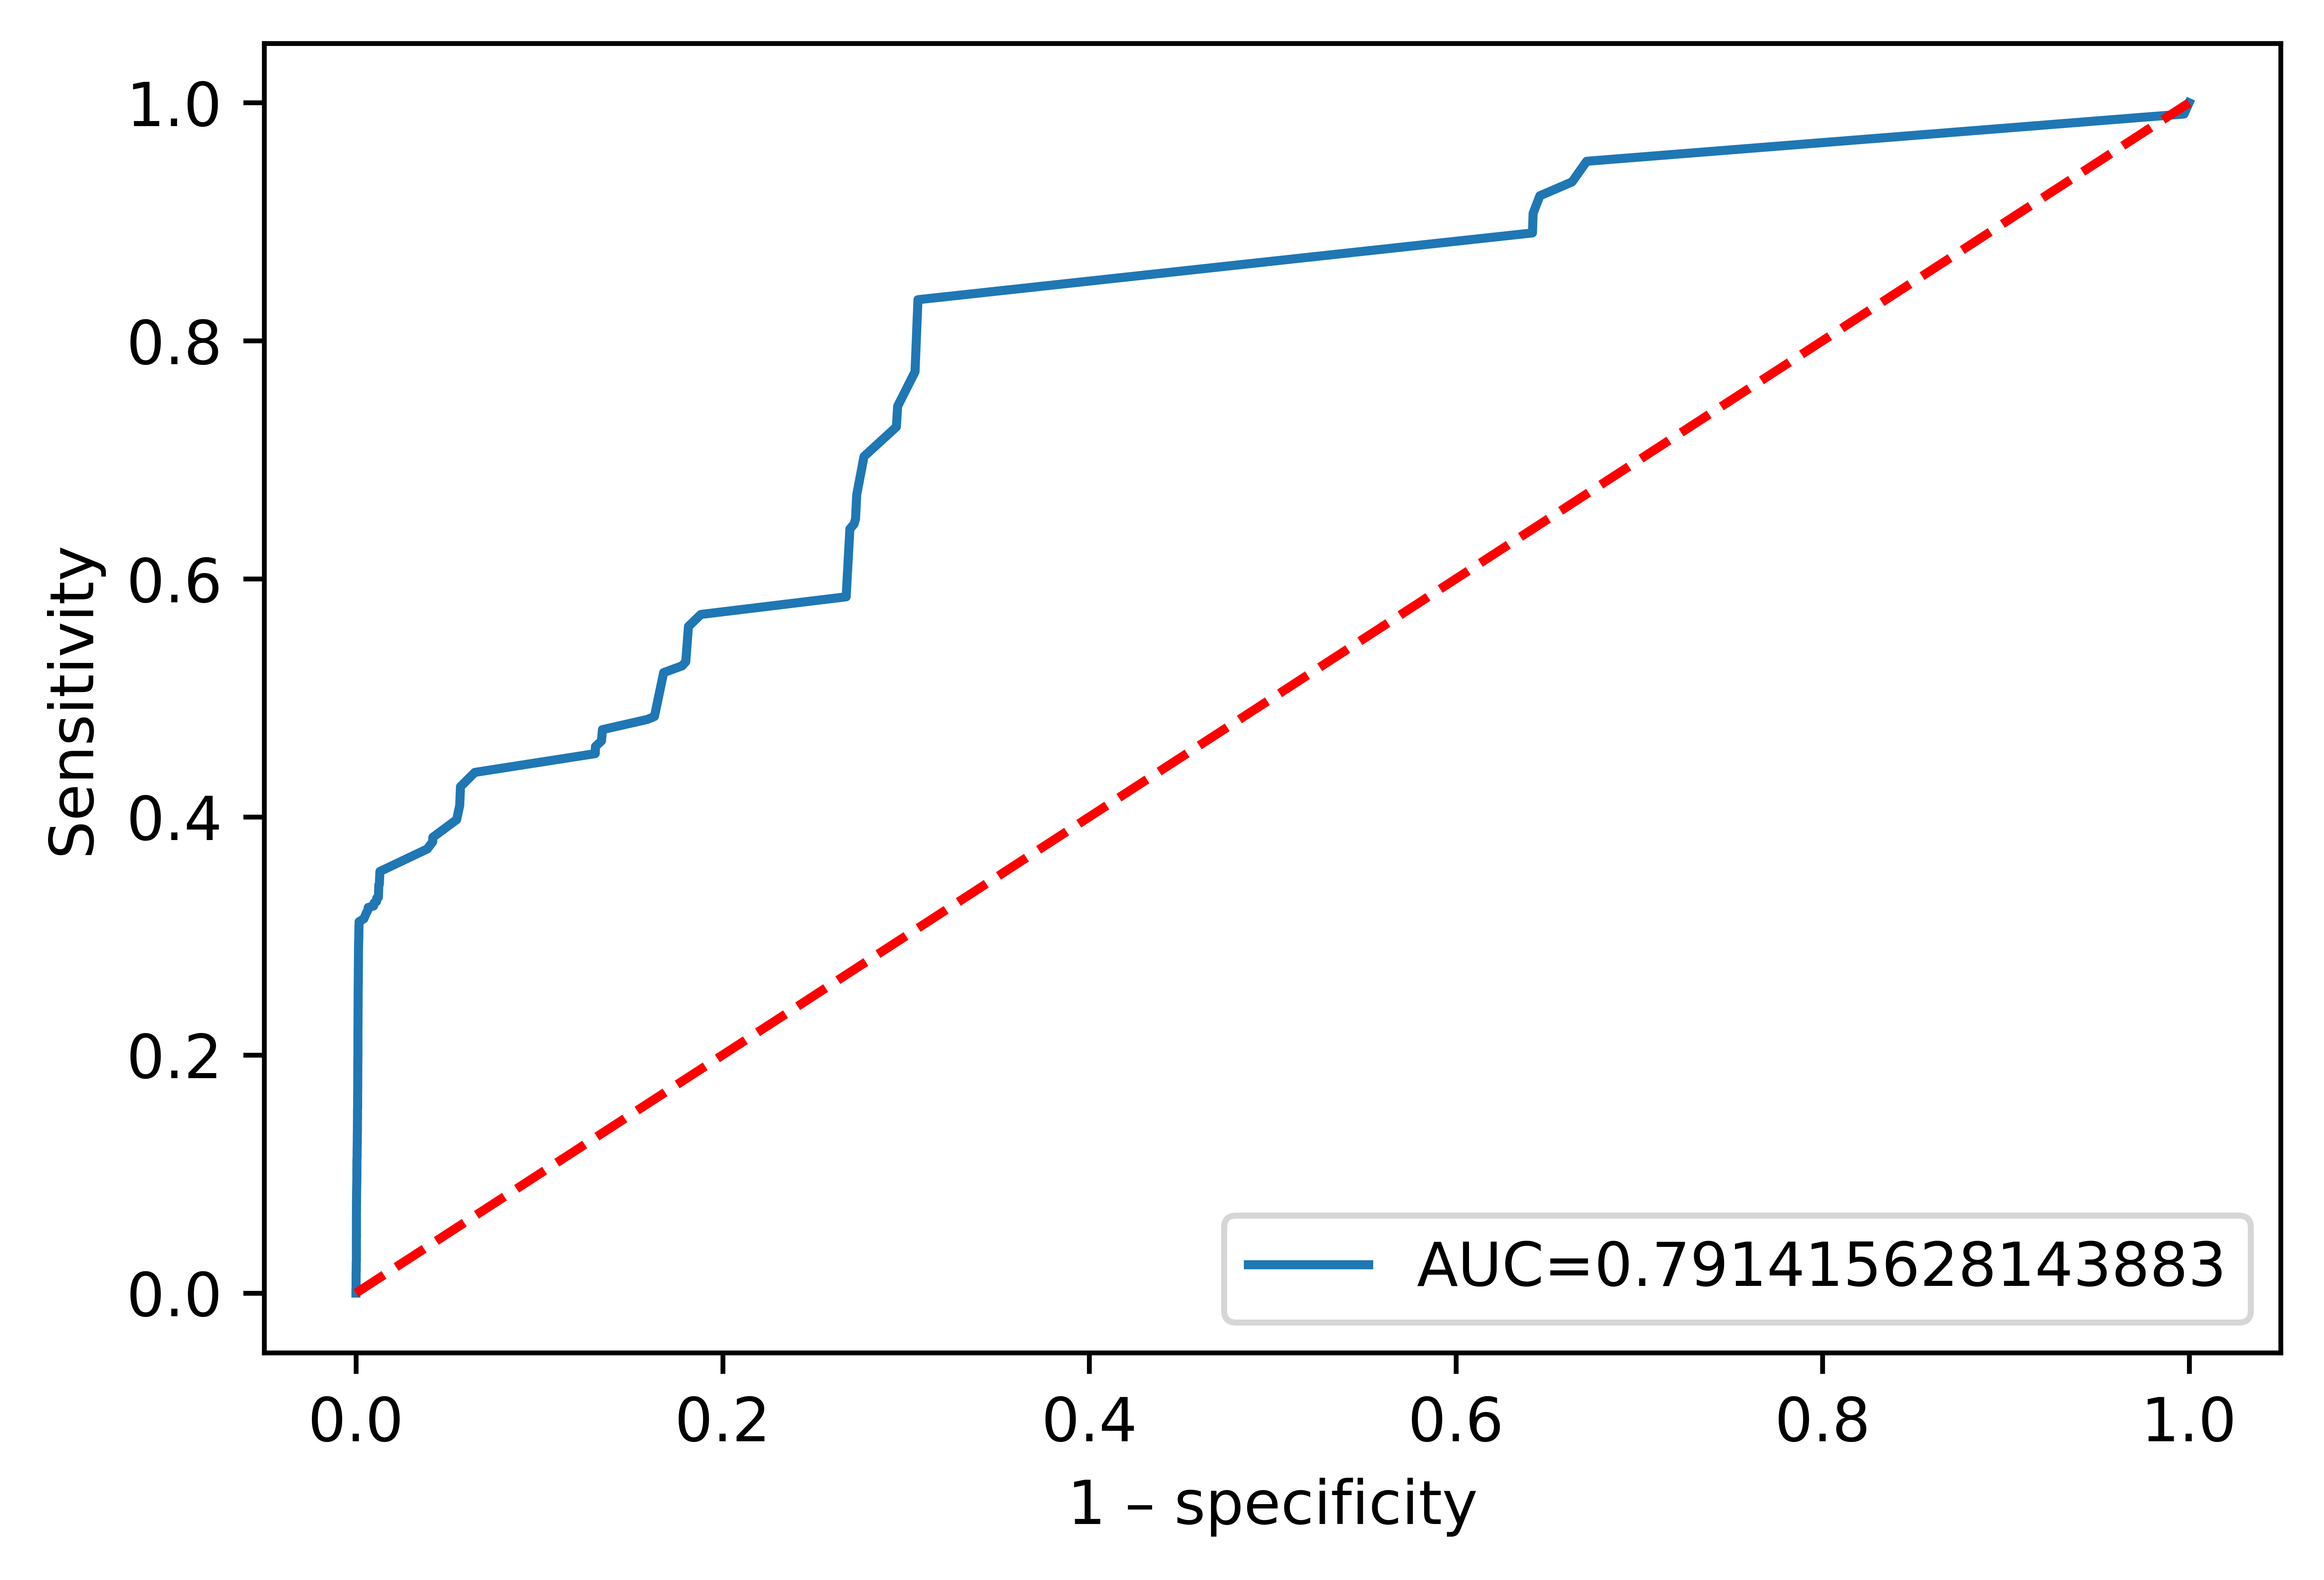

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1200
#define metrics
y_pred_proba = SVM.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.ylabel('Sensitivity')
plt.xlabel('1 – specificity')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred=SVM.predict(X_test)
accuracy_score(y_test,y_pred)

0.9450218885274768

In [ ]:
SVM_matrix=confusion_matrix(y_test,y_pred)

In [ ]:
print(SVM_matrix)

[[37651    65]
 [ 2183   990]]


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')


0.9320021189105901

In [ ]:
precision_score(y_test,y_pred)

0.9383886255924171

In [ ]:
recall_score(y_test,y_pred)


0.31200756381972894

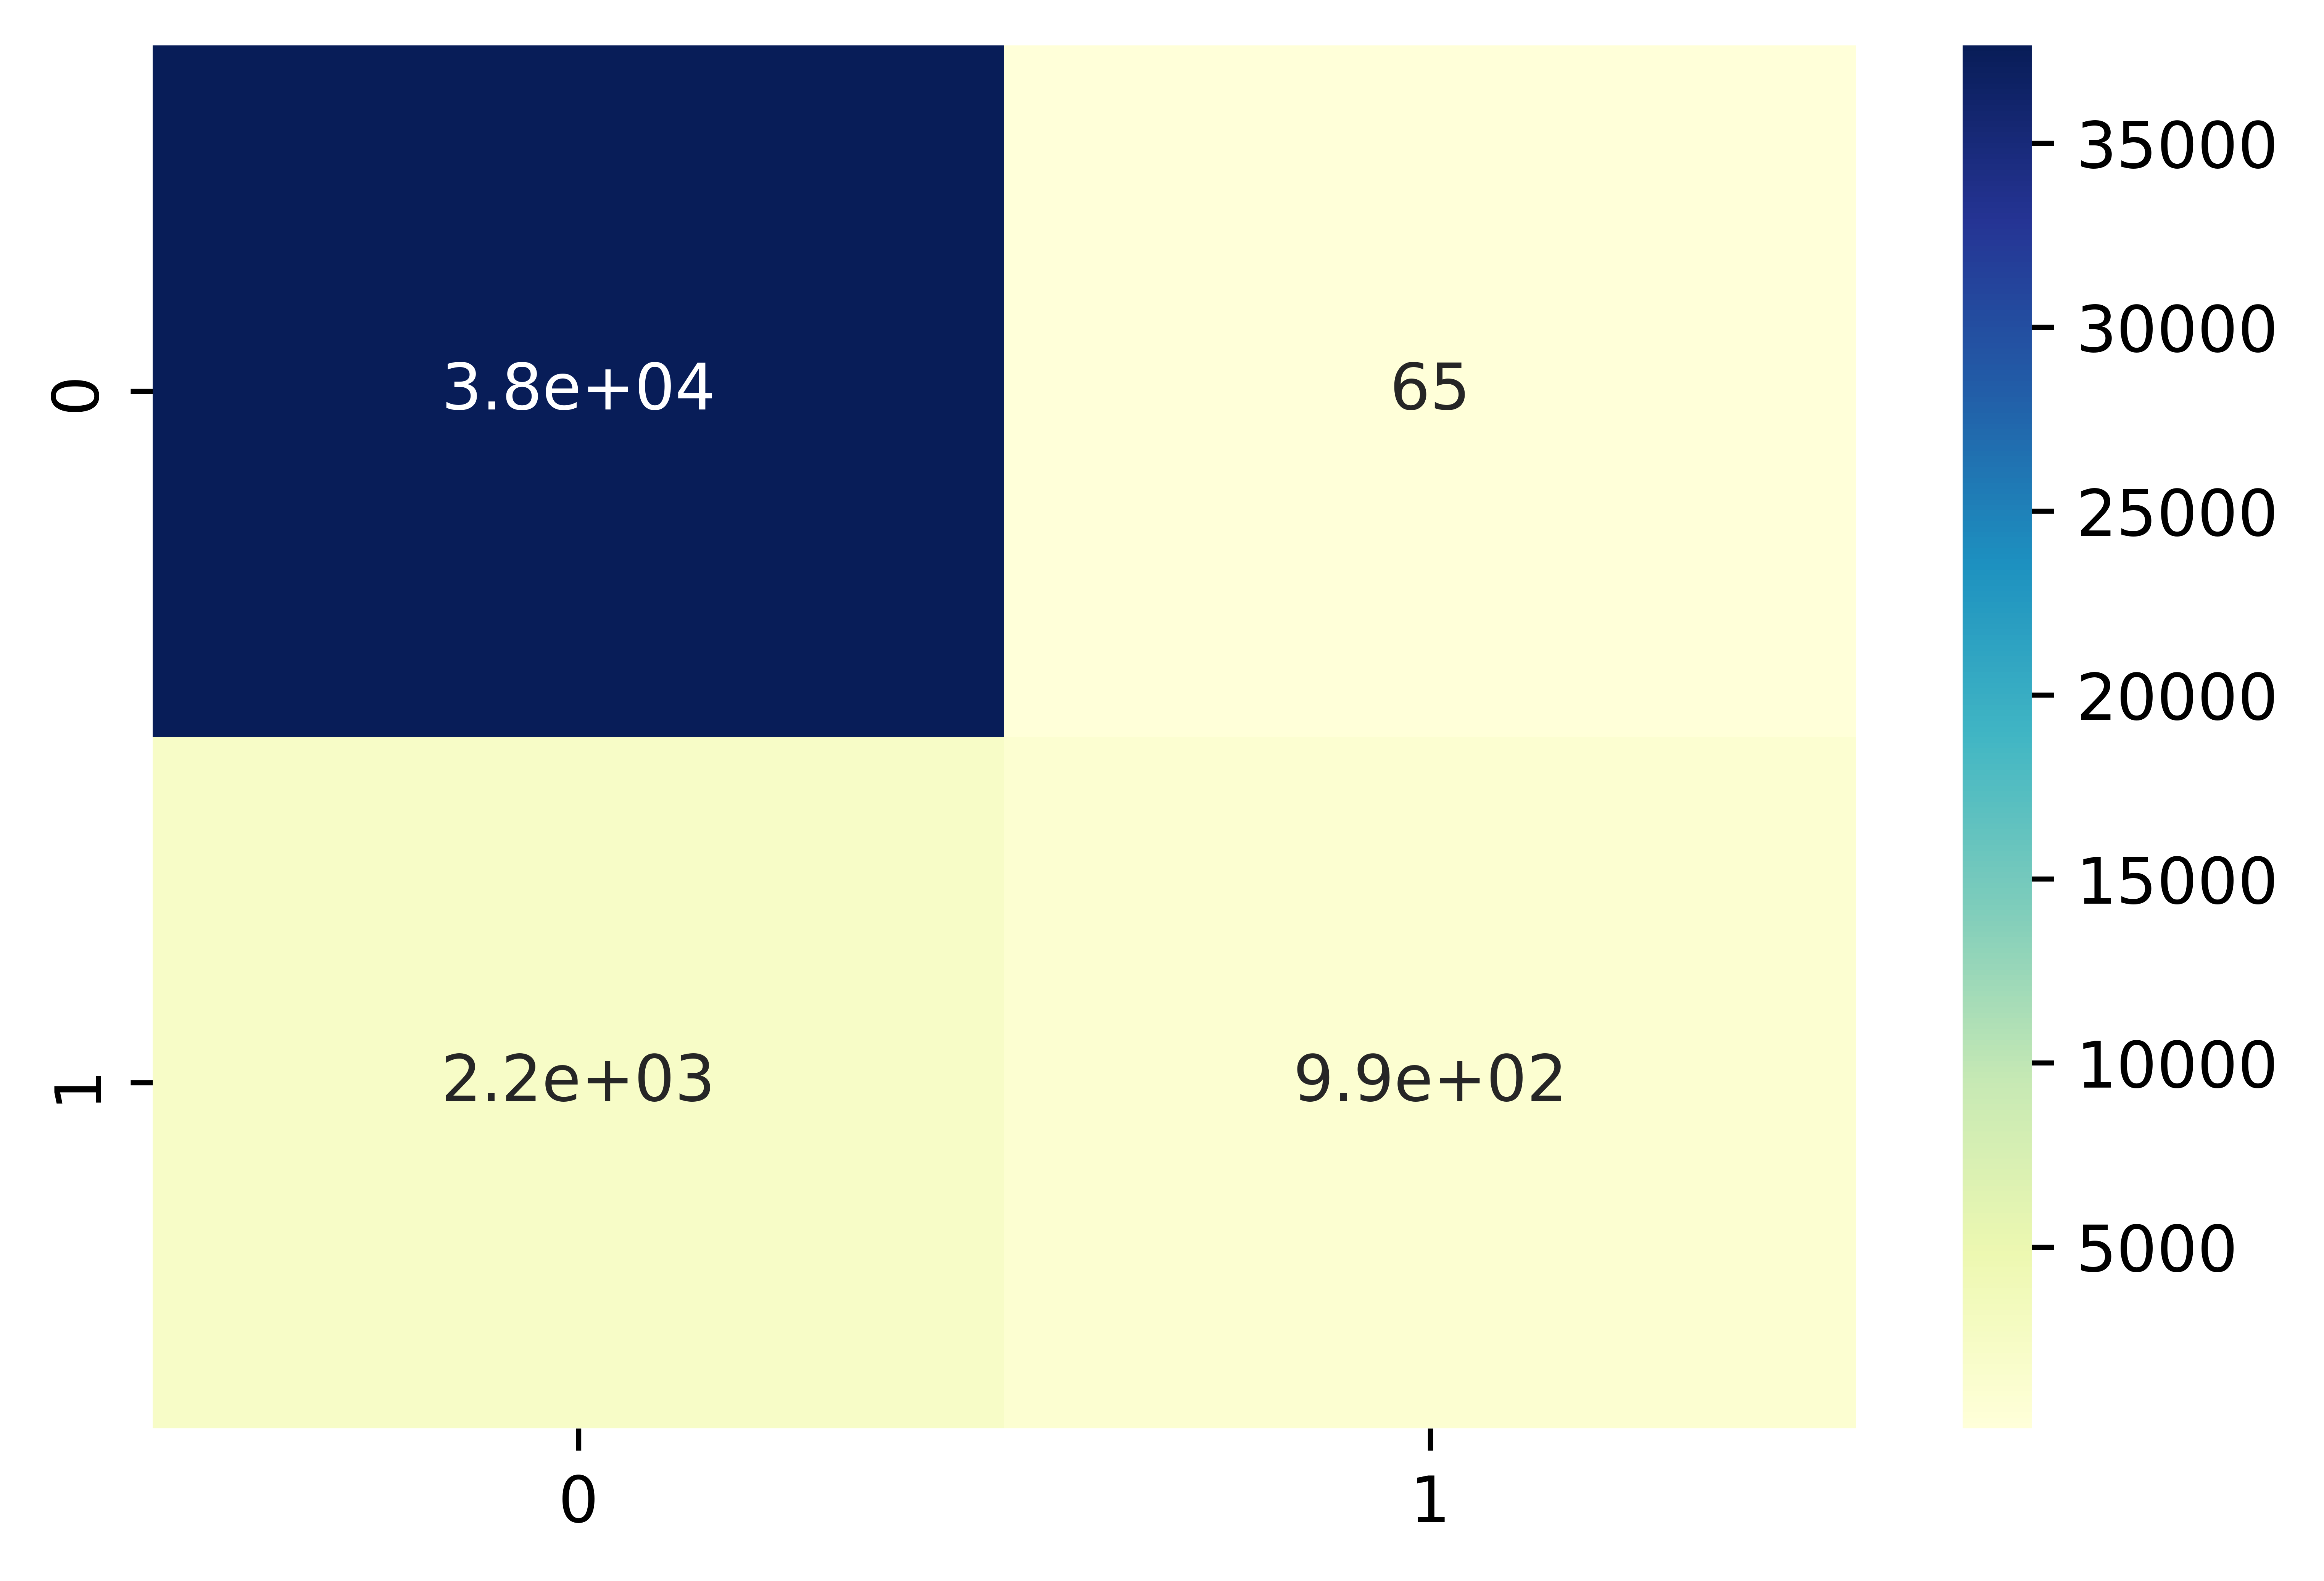

In [ ]:
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1200
SVM_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(SVM_matrix, annot=True, cmap='YlGnBu')